# Perceptron (Artificial Neuron)

* A Perceptron is a single layer neural network
* It acts a Linear Classifier, Binary classification
* Loss Function : Binary Cross Entropy(-ve of Log Likelihood)
* Optimisation : Gradient Descent/ Stochastic Gradient Descent

## Learning Goals

* How to implement Perceptron?
* Understanding Vectorization, writing efficient Code,without using for loop!
* What is the meaning of "Linear Classifier"?

In [146]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons,make_blobs
plt.style.use("seaborn")

In [147]:
X,y = make_blobs(n_samples=500,centers=2,n_features=2,random_state=42)

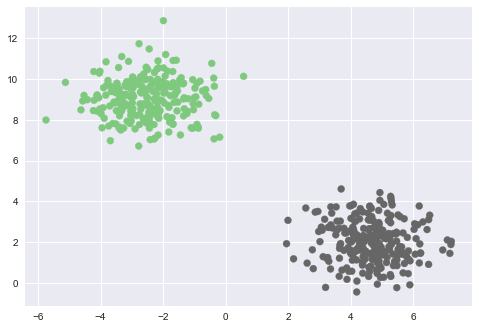

In [148]:
plt.scatter(X[:,0],X[:,1],c=y,cmap = plt.cm.Accent)
plt.show()

In [149]:
def sigmoid(z):
    return 1.0/(1.0+np.exp(-z))

def predict(X,W):
    y_pred = sigmoid(np.dot(X,W))
    return y_pred

def loss(X,y,W):
    y_pred = predict(X,W)
    loss  = -np.mean(y * np.log2(y_pred) + (1-y) * np.log2(1-y_pred))
    return loss

def update(X,y,weigths,lr):
    y_pred = predict(X,weigths)
    dw = np.dot(X.T,y_pred - y)
    
    weigths -= lr*dw/(float(X.shape[0]))
    return weigths

def train(X,y,lr=0.5,maxEpoch = 1000):
    ones = np.ones((X.shape[0],1))
    X = np.hstack((ones,X))
    weights = np.zeros(X.shape[1])
    loss_list = []
    for epoch in range(maxEpoch):
        if epoch%50==0:
            l = loss(X,y,weights)
            loss_list.append(l)
        weights = update(X,y,weights,lr)
    return weights,loss_list

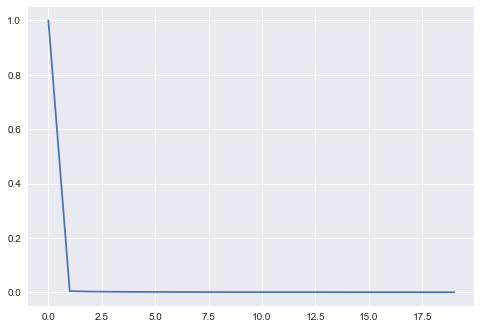

In [150]:
weights,loss_list = train(X,y)

plt.plot(loss_list)

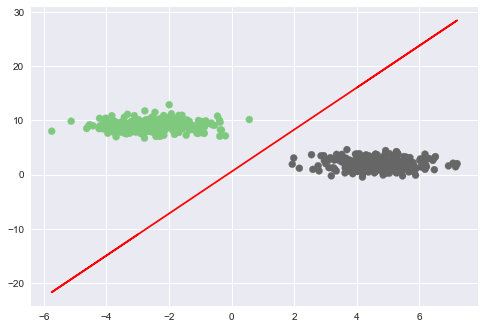

In [151]:
x2 = -(weights[1] * X[:,0] + weights[0])/weights[2]

plt.scatter(X[:,0],X[:,1],c=y,cmap = plt.cm.Accent)
plt.plot(X[:,0],x2,c="red")
plt.show()

In [152]:
def getPredictions(X_test,weights,labels=True):
    ones =np.ones((X_test.shape[0],1))
    X_test = np.hstack((ones,X_test))
    probs = predict(X_test,weights)
    
    if not labels:
        return probs
    else:
        labels = np.zeros(probs.shape)
        labels[probs>=0.5]=1
        return labels

In [153]:
y_pred = getPredictions(X,weights)

In [154]:
print(np.mean(y==y_pred))

1.0


In [155]:
X,y = make_moons(n_samples=1000,shuffle=True,noise=0.2,random_state=42)

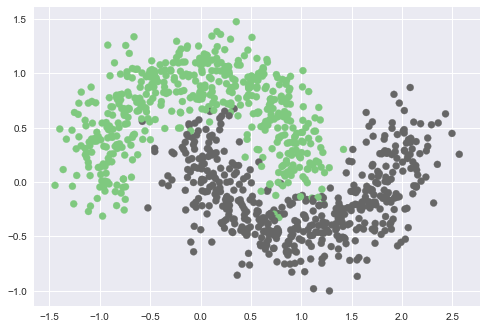

In [156]:
plt.scatter(X[:,0],X[:,1],c=y,cmap = plt.cm.Accent)
plt.show()

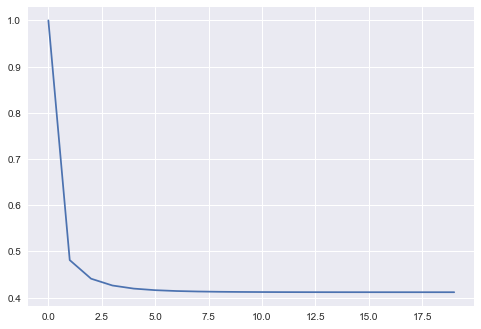

In [157]:
weights,loss_list = train(X,y)

plt.plot(loss_list)

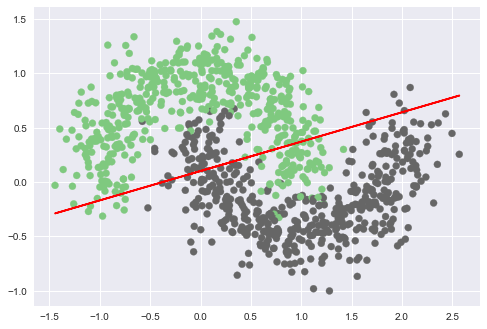

In [158]:
x2 = -(weights[1] * X[:,0] + weights[0])/weights[2]

plt.scatter(X[:,0],X[:,1],c=y,cmap = plt.cm.Accent)
plt.plot(X[:,0],x2,c="red")
plt.show()

In [159]:
y_pred = getPredictions(X,weights)

In [160]:
print(np.mean(y==y_pred))

0.871
